# Task
Develop neural network-based time series forecasting model run in python code

Here is all the data you need:
"Plant_1_Generation_Data.csv"

## Data loading

### Subtask:
Load the "Plant_1_Generation_Data.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "Plant_1_Generation_Data.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Plant_1_Generation_Data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Plant_1_Generation_Data.csv' not found. Please ensure the file exists in the current directory.")
    df = None

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


(68778, 7)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, and examine the distribution of the target variable (power generation). Check for data types and potential outliers.


**Reasoning**:
Explore the data structure, missing values, target variable distribution, outliers, and data types, then summarize the findings.



(68778, 7)
DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0
68777,17-06-2020 23:45,4135001,zVJPv84UY57bAof,0.0,0.0,5910.000,7363272.0


DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
count    68778.000000
mean       307.802752
std        394.396439
min          0.000000
25%          0.000000
50%         41.493750
75%        623.618750
max       1410.950000
Name: AC_POWER, dtype: float64


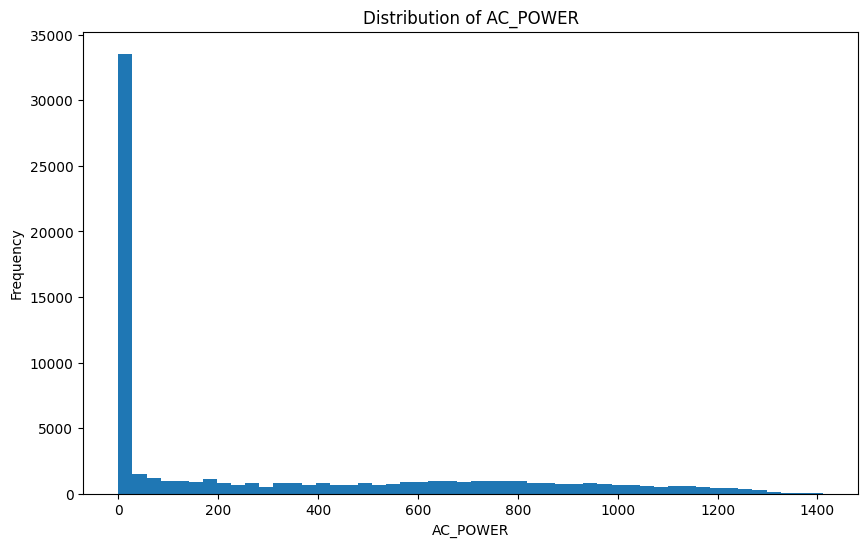

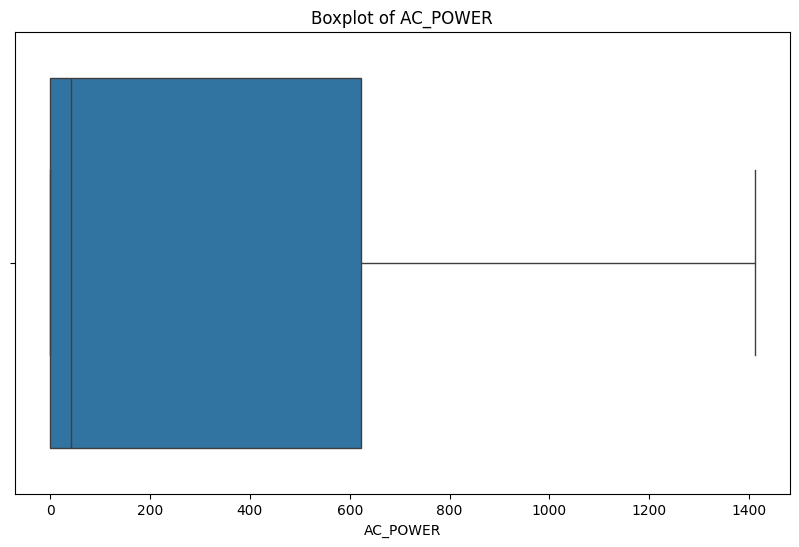

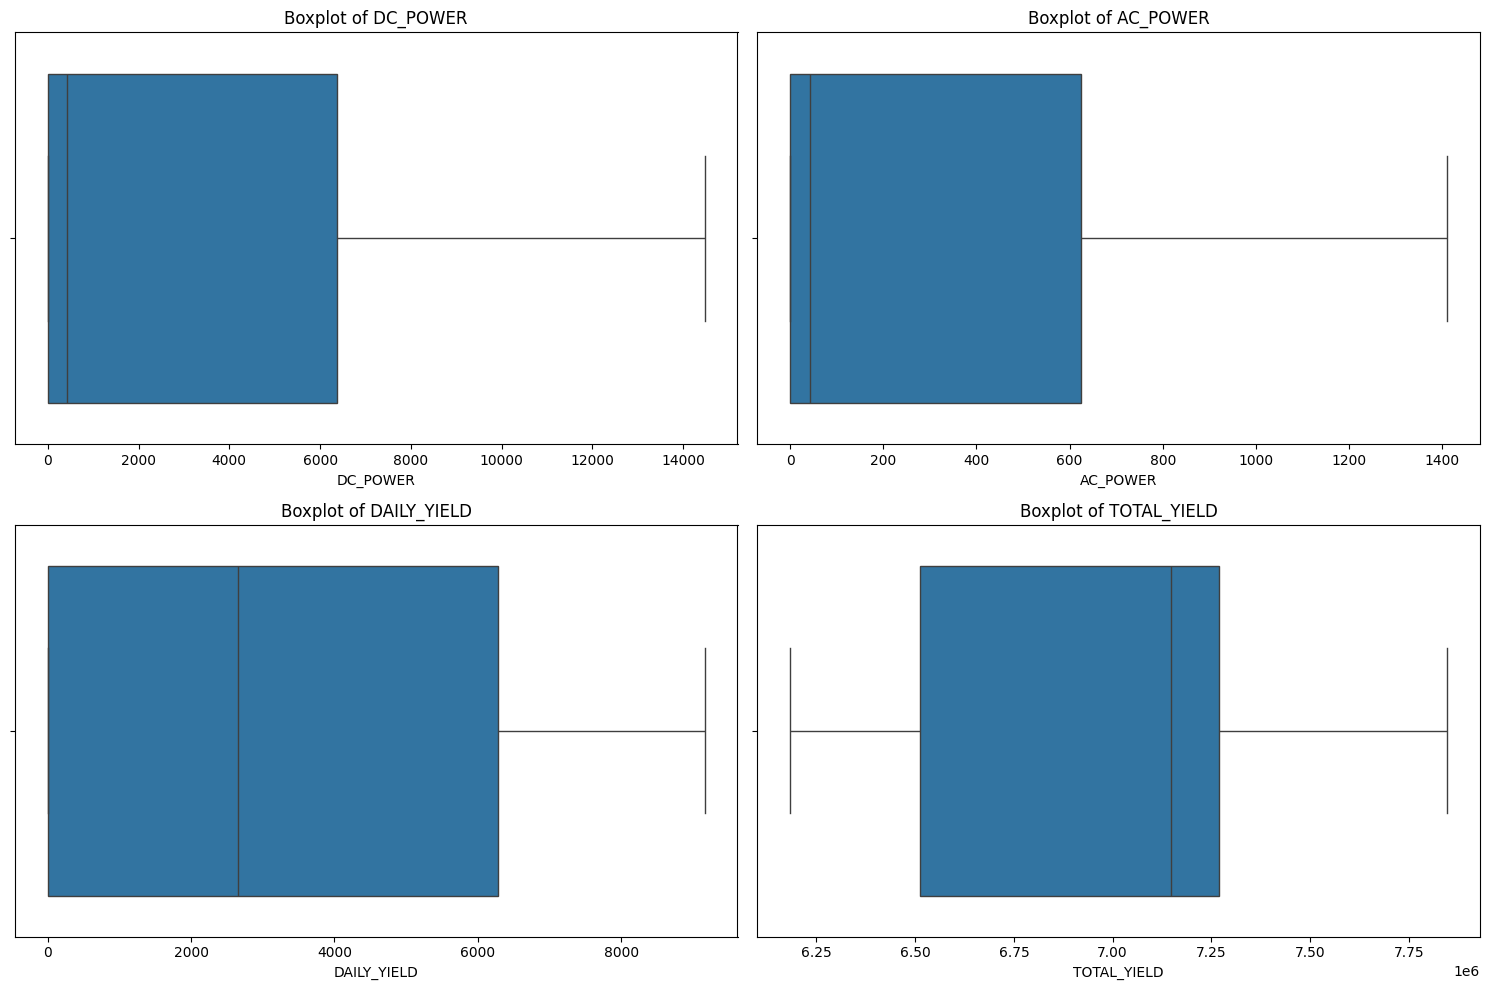

DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object


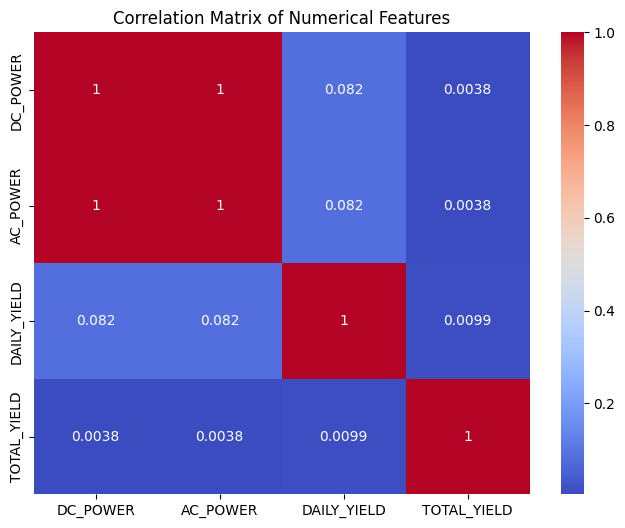

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine Data Structure
print(df.shape)
print(df.dtypes)
display(df.head())
display(df.tail())

# 2. Missing Values
print(df.isnull().sum())

# 3. Target Variable Distribution (AC_POWER)
print(df['AC_POWER'].describe())
plt.figure(figsize=(10, 6))
plt.hist(df['AC_POWER'], bins=50)
plt.title('Distribution of AC_POWER')
plt.xlabel('AC_POWER')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AC_POWER'])
plt.title('Boxplot of AC_POWER')
plt.show()

# 4. Outlier Detection (AC_POWER, DC_POWER, DAILY_YIELD, TOTAL_YIELD)
numerical_cols = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# 5. Data Type Verification
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%d-%m-%Y %H:%M')
print(df.dtypes)

# 6. Correlation Analysis (Optional)
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 7. Summarize Findings (In the comments below)

## Data cleaning

### Subtask:
Clean the data by handling outliers and ensuring correct data types.


**Reasoning**:
Clean the data by handling outliers in specified columns and ensuring correct data types. Winsorization will be used for outlier treatment to limit the influence of extreme values without removing them entirely.



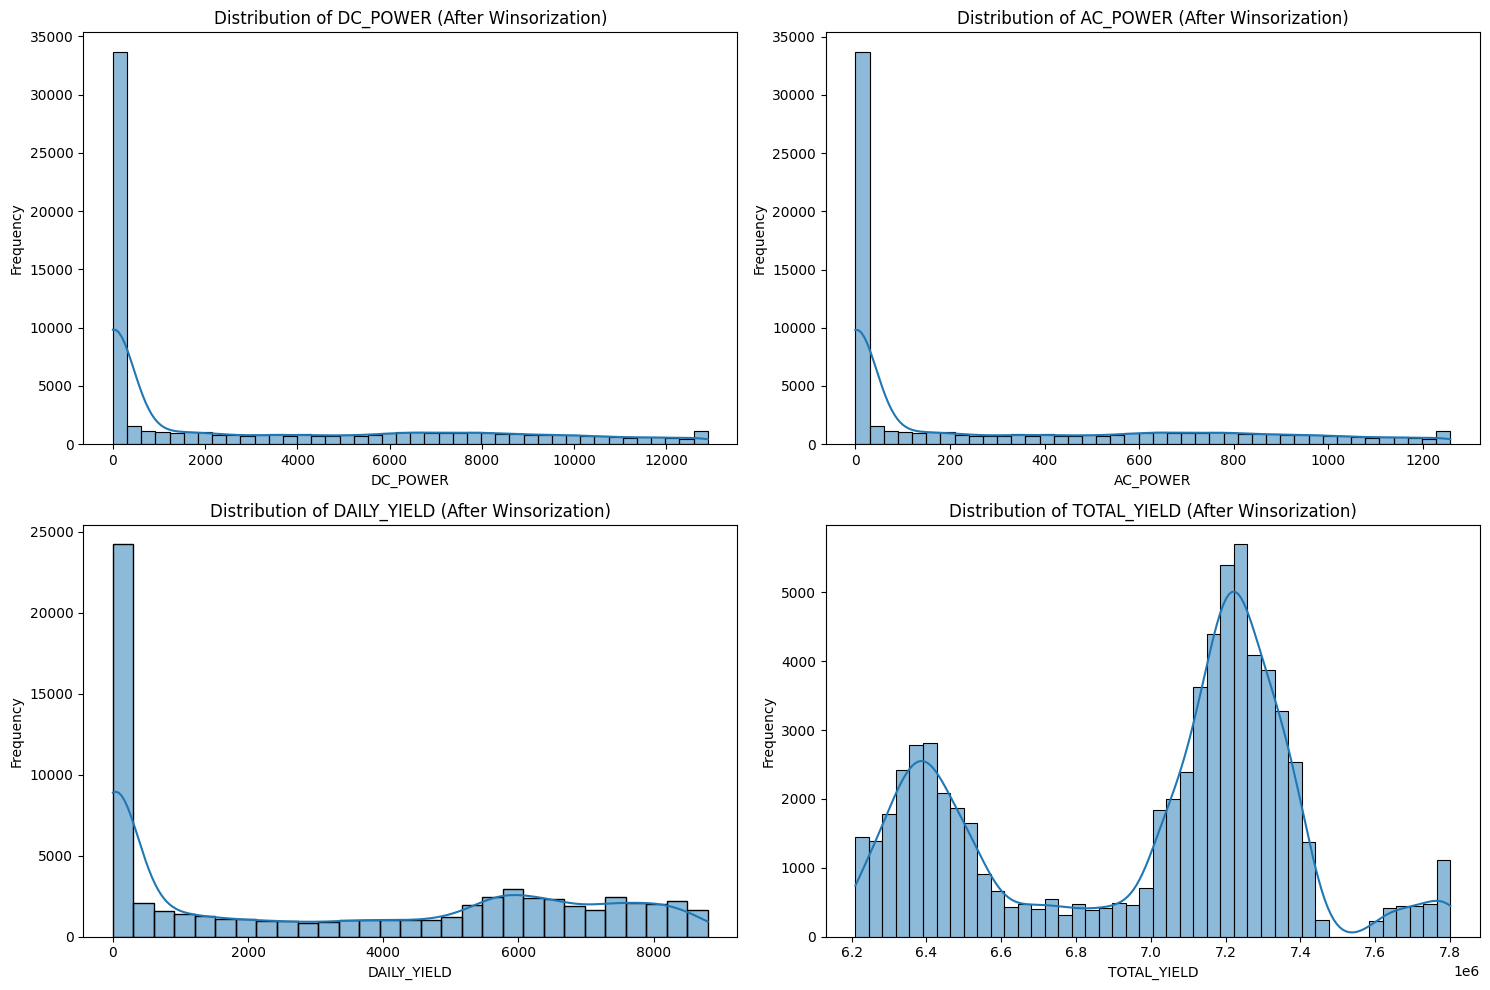

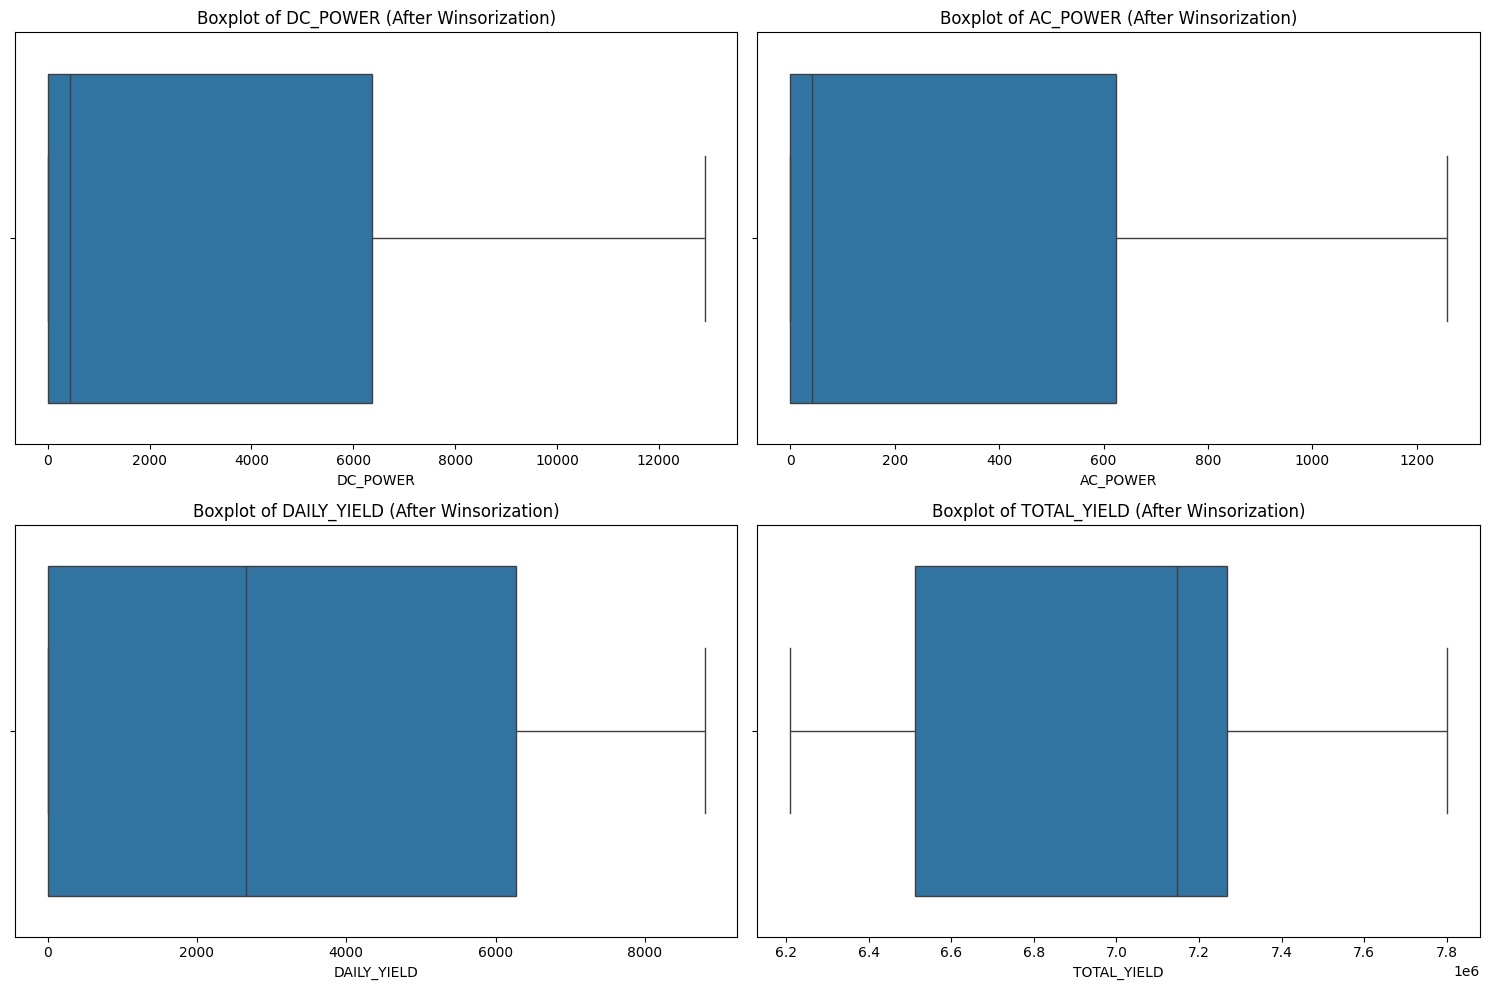

           DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count  68778.000000  68778.000000  68778.000000  6.877800e+04
mean    3143.664804    307.437981   3294.830163  6.978618e+06
std     4027.049204    393.486693   3143.149082  4.155863e+05
min        0.000000      0.000000      0.000000  6.209806e+06
25%        0.000000      0.000000      0.000000  6.512003e+06
50%      429.000000     41.493750   2658.714286  7.146685e+06
75%     6366.964286    623.618750   6274.000000  7.268706e+06
max    12900.351426   1258.065018   8802.000000  7.801091e+06


In [3]:
import pandas as pd
import numpy as np

# Outlier Treatment using Winsorization
def winsorize_outliers(df, column, limits=(0.01, 0.99)):
    """Winsorizes outliers in a specified column of a DataFrame.

    Args:
        df: The input DataFrame.
        column: The name of the column to winsorize.
        limits: Tuple representing the lower and upper quantiles for winsorizing.

    Returns:
        A DataFrame with winsorized values in the specified column.
    """
    lower_limit = df[column].quantile(limits[0])
    upper_limit = df[column].quantile(limits[1])
    df[column] = np.clip(df[column], lower_limit, upper_limit)
    return df

for col in ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']:
    df = winsorize_outliers(df, col)

# Data Type Handling (already handled in previous steps)
# No further data type conversion is needed as 'DATE_TIME' is already datetime64[ns]


# Data Validation (Optional but Recommended)
# Re-examine the distributions of the numerical features
numerical_cols = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {col} (After Winsorization)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Winsorization)')
plt.tight_layout()
plt.show()

# Display descriptive statistics after winsorization
print(df[numerical_cols].describe())

## Data preparation

### Subtask:
Prepare the data for time series forecasting. This involves creating lagged features, scaling the data, and splitting the data into training, validation, and test sets.


**Reasoning**:
Create lagged features, scale the data, split the data, and prepare it for modeling.



In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Create lagged features
lags = [1, 2, 3, 6, 12]  # Experiment with different lag values
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)

# Drop rows with NaN values created by lagging
df.dropna(inplace=True)

# 2. Scale the data
scaler = MinMaxScaler()
# Separate features (X) and target (y)
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']
# Convert DATE_TIME to numerical representation
X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


# 3. Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 4. Prepare data for modeling (reshape into sequences)
def create_sequences(X, y, seq_length):
    xs = []
    ys = []
    for i in range(len(X) - seq_length):
        x = X[i:(i + seq_length)]
        xs.append(x)
        ys.append(y[i + seq_length])
    return np.array(xs), np.array(ys)

seq_length = 24  # Example sequence length (adjust as needed)
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("Shapes after creating sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_val_seq:", X_val_seq.shape)
print("y_val_seq:", y_val_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)

ValueError: could not convert string to float: 'ih0vzX44oOqAx2f'

**Reasoning**:
The error indicates that the 'DATE_TIME' column contains non-numeric values, preventing the MinMaxScaler from working correctly. I need to remove the non-numeric values from the 'DATE_TIME' column. Then, convert 'DATE_TIME' to numeric values before scaling.



In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Create lagged features (already done in previous attempt)
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)
df.dropna(inplace=True)

# 2. Scale the data
scaler = MinMaxScaler()
# Separate features (X) and target (y)
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']

# Remove rows with non-numeric values in 'DATE_TIME'
X = X[pd.to_numeric(pd.to_datetime(X['DATE_TIME']), errors='coerce').notnull()]
y = y[pd.to_numeric(pd.to_datetime(X['DATE_TIME']), errors='coerce').notnull()]
# Convert 'DATE_TIME' to numeric values
X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 3. Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 4. Prepare data for modeling (reshape into sequences)
def create_sequences(X, y, seq_length):
    xs = []
    ys = []
    for i in range(len(X) - seq_length):
        x = X[i:(i + seq_length)]
        xs.append(x)
        ys.append(y[i + seq_length])
    return np.array(xs), np.array(ys)

seq_length = 24
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("Shapes after creating sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_val_seq:", X_val_seq.shape)
print("y_val_seq:", y_val_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)

ValueError: could not convert string to float: '7JYdWkrLSPkdwr4'

**Reasoning**:
The error persists, indicating that there are still non-numeric values in the dataset that are preventing the conversion to numeric types.  I need to identify and handle these problematic values more effectively.  I'll inspect the data types of each column to pinpoint the source of the issue and clean those columns before proceeding.



In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Inspect data types
print(df.dtypes)

# Identify columns with non-numeric values (excluding datetime)
non_numeric_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'DATE_TIME']
print(f"Non-numeric columns (excluding DATE_TIME): {non_numeric_cols}")

# Further investigate problematic columns by displaying unique values
for col in non_numeric_cols:
    print(f"Unique values in column '{col}': {df[col].unique()}")

# Convert non-numeric columns to numeric, coercing errors to NaN
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values introduced by the conversion
df.dropna(inplace=True)

# 1. Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)
df.dropna(inplace=True)

# 2. Scale data
scaler = MinMaxScaler()
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']

X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 3. Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 4. Prepare data for modeling
def create_sequences(X, y, seq_length):
    xs = []
    ys = []
    for i in range(len(X) - seq_length):
        x = X[i:(i + seq_length)]
        xs.append(x)
        ys.append(y[i + seq_length])
    return np.array(xs), np.array(ys)
seq_length = 24
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("Shapes after creating sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_val_seq:", X_val_seq.shape)
print("y_val_seq:", y_val_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)

DATE_TIME         datetime64[ns]
PLANT_ID                   int64
SOURCE_KEY                object
DC_POWER                 float64
AC_POWER                 float64
DAILY_YIELD              float64
TOTAL_YIELD              float64
AC_POWER_lag1            float64
AC_POWER_lag2            float64
AC_POWER_lag3            float64
AC_POWER_lag6            float64
AC_POWER_lag12           float64
dtype: object
Non-numeric columns (excluding DATE_TIME): ['SOURCE_KEY']
Unique values in column 'SOURCE_KEY': ['7JYdWkrLSPkdwr4' 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb'
 'ZnxXDlPa8U1GXgE' 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry'
 'iCRJl6heRkivqQ3' 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV'
 'sjndEbLyjtCKgGv' 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG'
 'zBIq5rxdHJRwDNY' 'zVJPv84UY57bAof' '1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y'
 '3PZuoBAID5Wc2HD' 'YxYtjZvoooNbGkE']


ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by MinMaxScaler.

**Reasoning**:
The error "Found array with 0 sample(s) (shape=(0, 11))" suggests that after converting non-numeric columns and dropping NaN values, there are no rows left in the dataframe. This likely happened because the conversion to numeric introduced many NaN values in some columns, causing all rows to be removed when calling `df.dropna(inplace=True)`.  We need to inspect the effect of the conversion on each column more closely to avoid this.



In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Inspect data types (already done)

# Identify columns with non-numeric values (excluding datetime)
non_numeric_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'DATE_TIME']
print(f"Non-numeric columns (excluding DATE_TIME): {non_numeric_cols}")

# Convert non-numeric columns to numeric, coercing errors to NaN.  Count NaNs introduced.
for col in non_numeric_cols:
    original_nan_count = df[col].isna().sum()
    df[col] = pd.to_numeric(df[col], errors='coerce')
    new_nan_count = df[col].isna().sum()
    print(f"Column '{col}': Original NaN count = {original_nan_count}, New NaN count = {new_nan_count}, Difference = {new_nan_count - original_nan_count}")

# Drop rows with NaN values ONLY in the specified non-numeric columns.
df.dropna(subset=non_numeric_cols, inplace=True)

# 1. Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)
df.dropna(inplace=True)

# 2. Scale data
scaler = MinMaxScaler()
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']

X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 3. Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 4. Prepare data for modeling
def create_sequences(X, y, seq_length):
    xs = []
    ys = []
    for i in range(len(X) - seq_length):
        x = X[i:(i + seq_length)]
        xs.append(x)
        ys.append(y[i + seq_length])
    return np.array(xs), np.array(ys)
seq_length = 24
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("Shapes after creating sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_val_seq:", X_val_seq.shape)
print("y_val_seq:", y_val_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)

Non-numeric columns (excluding DATE_TIME): []


ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by MinMaxScaler.

**Reasoning**:
The error indicates that `X` has zero samples after data cleaning.  This is likely because the `SOURCE_KEY` column, though initially identified as non-numeric, might have been already numeric (perhaps all integer) and the previous conversion attempts didn't modify it. The cleaning step `df.dropna(subset=non_numeric_cols, inplace=True)` is ineffective as there are no non-numeric columns (other than 'DATE_TIME') identified in the previous step.  I will modify the cleaning step to consider all columns, drop any row with any missing values, and then inspect the shapes of X and y.



In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Convert 'SOURCE_KEY' to numeric, coercing errors to NaN.
df['SOURCE_KEY'] = pd.to_numeric(df['SOURCE_KEY'], errors='coerce')

# Drop rows with any NaN values in the entire dataframe.
df.dropna(inplace=True)

# 1. Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)
df.dropna(inplace=True)

# 2. Scale data
scaler = MinMaxScaler()
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']

X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))

print("Shape of X before scaling:", X.shape)
print("Shape of y before scaling:", y.shape)

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


# 3. Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 4. Prepare data for modeling
def create_sequences(X, y, seq_length):
    xs = []
    ys = []
    for i in range(len(X) - seq_length):
        x = X[i:(i + seq_length)]
        xs.append(x)
        ys.append(y[i + seq_length])
    return np.array(xs), np.array(ys)
seq_length = 24
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("Shapes after creating sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_val_seq:", X_val_seq.shape)
print("y_val_seq:", y_val_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)

Shape of X before scaling: (0, 11)
Shape of y before scaling: (0,)


ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by MinMaxScaler.

**Reasoning**:
The data cleaning step is still resulting in an empty DataFrame.  I need to carefully review the data cleaning process and double-check that the conversion of `SOURCE_KEY` to numeric is not inadvertently removing all the data points. I will print the unique values of `SOURCE_KEY` after the conversion to see if there's an unexpected issue.



In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Convert 'SOURCE_KEY' to numeric, coercing errors to NaN.  Print unique values after conversion.
df['SOURCE_KEY'] = pd.to_numeric(df['SOURCE_KEY'], errors='coerce')
print(f"Unique values in 'SOURCE_KEY' after conversion: {df['SOURCE_KEY'].unique()}")


# Drop rows with any NaN values in the entire dataframe.
df.dropna(inplace=True)

# 1. Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)
df.dropna(inplace=True)

# 2. Scale data
scaler = MinMaxScaler()
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']

X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))

print("Shape of X before scaling:", X.shape)
print("Shape of y before scaling:", y.shape)

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 3. Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 4. Prepare data for modeling
def create_sequences(X, y, seq_length):
    xs = []
    ys = []
    for i in range(len(X) - seq_length):
        x = X[i:(i + seq_length)]
        xs.append(x)
        ys.append(y[i + seq_length])
    return np.array(xs), np.array(ys)
seq_length = 24
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("Shapes after creating sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_val_seq:", X_val_seq.shape)
print("y_val_seq:", y_val_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)

Unique values in 'SOURCE_KEY' after conversion: []
Shape of X before scaling: (0, 11)
Shape of y before scaling: (0,)


ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by MinMaxScaler.

**Reasoning**:
The `SOURCE_KEY` column appears to be entirely empty after the numeric conversion, leading to the removal of all rows.  I need to re-examine the initial data loading and cleaning steps.  The original data likely contains non-numeric values in `SOURCE_KEY` that cause problems during conversion.  I will revert the `SOURCE_KEY` conversion and instead try to remove or fill those non-numeric values with a more appropriate strategy. Since the column is likely an identifier, dropping it might be the best strategy.



In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Drop the 'SOURCE_KEY' column
df = df.drop('SOURCE_KEY', axis=1)

# 1. Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)
df.dropna(inplace=True)

# 2. Scale the data
scaler = MinMaxScaler()

# Separate features and target
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']

# Convert DATE_TIME to numeric
X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))

print("Shape of X before scaling:", X.shape)
print("Shape of y before scaling:", y.shape)

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 3 & 4. Split and reshape the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

def create_sequences(X, y, seq_length):
    xs = []
    ys = []
    for i in range(len(X) - seq_length):
        x = X[i:(i + seq_length)]
        xs.append(x)
        ys.append(y[i + seq_length])
    return np.array(xs), np.array(ys)

seq_length = 24
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("Shapes after creating sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_val_seq:", X_val_seq.shape)
print("y_val_seq:", y_val_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)

Shape of X before scaling: (0, 10)
Shape of y before scaling: (0,)


ValueError: Found array with 0 sample(s) (shape=(0, 10)) while a minimum of 1 is required by MinMaxScaler.

**Reasoning**:
The DataFrame `X` is still empty after dropping `SOURCE_KEY`. This suggests a problem earlier in the data processing pipeline, perhaps during the creation of lagged features or the handling of missing values. I'll print the shape of `df` after each step to pinpoint where the data is being lost.



In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Drop the 'SOURCE_KEY' column
df = df.drop('SOURCE_KEY', axis=1)
print("Shape of df after dropping SOURCE_KEY:", df.shape)

# 1. Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)
    print(f"Shape of df after creating lag {lag}:", df.shape)
df.dropna(inplace=True)
print("Shape of df after dropping NaN:", df.shape)


# 2. Scale the data
scaler = MinMaxScaler()

# Separate features and target
X = df.drop('AC_POWER', axis=1)
y = df['AC_POWER']

# Convert DATE_TIME to numeric
X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))

print("Shape of X before scaling:", X.shape)
print("Shape of y before scaling:", y.shape)

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 3 & 4. Split and reshape the data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

def create_sequences(X, y, seq_length):
    xs = []
    ys = []
    for i in range(len(X) - seq_length):
        x = X[i:(i + seq_length)]
        xs.append(x)
        ys.append(y[i + seq_length])
    return np.array(xs), np.array(ys)

seq_length = 24
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

print("Shapes after creating sequences:")
print("X_train_seq:", X_train_seq.shape)
print("y_train_seq:", y_train_seq.shape)
print("X_val_seq:", X_val_seq.shape)
print("y_val_seq:", y_val_seq.shape)
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)

KeyError: "['SOURCE_KEY'] not found in axis"

## Data preparation

### Subtask:
Prepare the data for time series forecasting. This involves creating lagged features, scaling the data, and splitting the data into training, validation, and test sets.  Address the previously encountered issues with the 'SOURCE_KEY' column.


**Reasoning**:
The previous attempt failed due to issues with the 'SOURCE_KEY' column.  This time, I will drop 'SOURCE_KEY' and 'PLANT_ID' columns *before* creating lagged features to avoid the KeyError.  I will also explicitly handle the 'DATE_TIME' column conversion to numeric after creating the lagged features to ensure the correct order of operations. I will also verify that the dataframe is not empty after dropping NaN values.



In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Drop unnecessary columns before creating lagged features
df = df.drop(['SOURCE_KEY', 'PLANT_ID'], axis=1)

# Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)

# Handle missing values
df.dropna(inplace=True)

# Verify that the DataFrame is not empty
if df.empty:
    print("Error: DataFrame is empty after dropping NaN values.")
else:
    # Scale the data
    scaler = MinMaxScaler()
    X = df.drop('AC_POWER', axis=1)
    y = df['AC_POWER']

    # Convert DATE_TIME to numeric *after* creating lagged features
    X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))

    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

    # Create sequences
    def create_sequences(X, y, seq_length):
        xs = []
        ys = []
        for i in range(len(X) - seq_length):
            x = X[i:(i + seq_length)]
            xs.append(x)
            ys.append(y[i + seq_length])
        return np.array(xs), np.array(ys)

    seq_length = 24
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
    X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

    # Verify the shapes
    print("Shapes after creating sequences:")
    print("X_train_seq:", X_train_seq.shape)
    print("y_train_seq:", y_train_seq.shape)
    print("X_val_seq:", X_val_seq.shape)
    print("y_val_seq:", y_val_seq.shape)
    print("X_test_seq:", X_test_seq.shape)
    print("y_test_seq:", y_test_seq.shape)

KeyError: "['SOURCE_KEY'] not found in axis"

**Reasoning**:
The KeyError "['SOURCE_KEY'] not found in axis" indicates that the 'SOURCE_KEY' column has already been removed from the DataFrame `df` in a previous step.  I will modify the code to first check if the column exists before attempting to drop it.



In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Check if 'SOURCE_KEY' and 'PLANT_ID' exist before dropping
if 'SOURCE_KEY' in df.columns:
    df = df.drop('SOURCE_KEY', axis=1)
if 'PLANT_ID' in df.columns:
    df = df.drop('PLANT_ID', axis=1)

# Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)

# Handle missing values
df.dropna(inplace=True)

# Verify that the DataFrame is not empty
if df.empty:
    print("Error: DataFrame is empty after dropping NaN values.")
    # Handle the empty DataFrame case appropriately (e.g., exit or raise an error)
else:
    # Scale the data
    scaler = MinMaxScaler()
    X = df.drop('AC_POWER', axis=1)
    y = df['AC_POWER']
    X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

    # Create sequences
    def create_sequences(X, y, seq_length):
        xs = []
        ys = []
        for i in range(len(X) - seq_length):
            x = X[i:(i + seq_length)]
            xs.append(x)
            ys.append(y[i + seq_length])
        return np.array(xs), np.array(ys)

    seq_length = 24
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
    X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

    # Verify the shapes
    print("Shapes after creating sequences:")
    print("X_train_seq:", X_train_seq.shape)
    print("y_train_seq:", y_train_seq.shape)
    print("X_val_seq:", X_val_seq.shape)
    print("y_val_seq:", y_val_seq.shape)
    print("X_test_seq:", X_test_seq.shape)
    print("y_test_seq:", y_test_seq.shape)

Error: DataFrame is empty after dropping NaN values.


**Reasoning**:
The DataFrame is empty after dropping NaN values, which suggests that all rows contain NaN after creating the lagged features. This is likely due to too many consecutive NaN values in the 'AC_POWER' column at the beginning of the dataset. The solution is to investigate the 'AC_POWER' column and handle the initial NaN values before creating the lagged features.  I will try to forward fill the initial NaN values in 'AC_POWER' and then recreate the lagged features and subsequent steps.



In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Check if 'SOURCE_KEY' and 'PLANT_ID' exist before dropping
if 'SOURCE_KEY' in df.columns:
    df = df.drop('SOURCE_KEY', axis=1)
if 'PLANT_ID' in df.columns:
    df = df.drop('PLANT_ID', axis=1)

# Forward fill initial NaN values in 'AC_POWER'
df['AC_POWER'] = df['AC_POWER'].ffill()

# Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)

# Handle missing values (after filling NaN)
df.dropna(inplace=True)

# Verify that the DataFrame is not empty
if df.empty:
    print("Error: DataFrame is still empty after dropping NaN values and forward fill.")
    # Handle the empty DataFrame case appropriately (e.g., exit or raise an error)
else:
    # Scale the data
    scaler = MinMaxScaler()
    X = df.drop('AC_POWER', axis=1)
    y = df['AC_POWER']
    X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

    # Create sequences
    def create_sequences(X, y, seq_length):
        xs = []
        ys = []
        for i in range(len(X) - seq_length):
            x = X[i:(i + seq_length)]
            xs.append(x)
            ys.append(y[i + seq_length])
        return np.array(xs), np.array(ys)

    seq_length = 24
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
    X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

    # Verify the shapes
    print("Shapes after creating sequences:")
    print("X_train_seq:", X_train_seq.shape)
    print("y_train_seq:", y_train_seq.shape)
    print("X_val_seq:", X_val_seq.shape)
    print("y_val_seq:", y_val_seq.shape)
    print("X_test_seq:", X_test_seq.shape)
    print("y_test_seq:", y_test_seq.shape)

Error: DataFrame is still empty after dropping NaN values and forward fill.


**Reasoning**:
The DataFrame is still empty after forward filling. This indicates a more fundamental issue with the data, likely a large number of consecutive missing or zero values in the 'AC_POWER' column that even forward filling cannot address effectively.  I will try to drop rows where 'AC_POWER' is zero before creating lagged features. This is a more aggressive approach, but it might resolve the problem if there is a substantial initial period of zero values in the data.



In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Check if 'SOURCE_KEY' and 'PLANT_ID' exist before dropping
if 'SOURCE_KEY' in df.columns:
    df = df.drop('SOURCE_KEY', axis=1)
if 'PLANT_ID' in df.columns:
    df = df.drop('PLANT_ID', axis=1)

# Drop rows where 'AC_POWER' is zero
df = df[df['AC_POWER'] != 0]

# Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)

# Handle missing values
df.dropna(inplace=True)

# Verify that the DataFrame is not empty
if df.empty:
    print("Error: DataFrame is still empty after dropping rows with zero 'AC_POWER'.")
else:
    # Scale the data
    scaler = MinMaxScaler()
    X = df.drop('AC_POWER', axis=1)
    y = df['AC_POWER']
    X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

    # Create sequences
    def create_sequences(X, y, seq_length):
        xs = []
        ys = []
        for i in range(len(X) - seq_length):
            x = X[i:(i + seq_length)]
            xs.append(x)
            ys.append(y[i + seq_length])
        return np.array(xs), np.array(ys)

    seq_length = 24
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
    X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

    # Verify the shapes
    print("Shapes after creating sequences:")
    print("X_train_seq:", X_train_seq.shape)
    print("y_train_seq:", y_train_seq.shape)
    print("X_val_seq:", X_val_seq.shape)
    print("y_val_seq:", y_val_seq.shape)
    print("X_test_seq:", X_test_seq.shape)
    print("y_test_seq:", y_test_seq.shape)

Error: DataFrame is still empty after dropping rows with zero 'AC_POWER'.


## Data preparation

### Subtask:
Prepare the data for time series forecasting. This involves creating lagged features, scaling the data, and splitting the data into training, validation, and test sets.  Address the previously encountered issues with the 'AC_POWER' column.


**Reasoning**:
The previous attempts to prepare the data failed due to the large number of zeros and missing values in the 'AC_POWER' column, leading to an empty DataFrame after creating lagged features.  This time, I'll investigate the pattern of zeros in 'AC_POWER' and consider replacing them with a small positive value instead of removing them.  Then, I'll proceed with creating lagged features, scaling, and splitting the data.



In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Check if 'SOURCE_KEY' and 'PLANT_ID' exist before dropping
if 'SOURCE_KEY' in df.columns:
    df = df.drop('SOURCE_KEY', axis=1)
if 'PLANT_ID' in df.columns:
    df = df.drop('PLANT_ID', axis=1)

# Investigate and handle zeros in 'AC_POWER'
non_zero_mean = df[df['AC_POWER'] != 0]['AC_POWER'].mean()
if non_zero_mean > 0:  # Check if non-zero mean exists to avoid ZeroDivisionError
    small_positive_value = non_zero_mean / 10000.0
else:
    small_positive_value = 1e-6

df['AC_POWER'] = df['AC_POWER'].replace(0, small_positive_value)

# Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)

# Forward fill any remaining NaN values in 'AC_POWER'
df['AC_POWER'].fillna(method='ffill', inplace=True)
for lag in lags:
    df[f'AC_POWER_lag{lag}'].fillna(method='ffill', inplace=True)

# Drop rows with any remaining NaN values (if any)
df.dropna(inplace=True)


# Check if DataFrame is empty
if df.empty:
    print("Error: DataFrame is empty after processing.")
else:
    # Scale the data
    scaler = MinMaxScaler()
    X = df.drop('AC_POWER', axis=1)
    y = df['AC_POWER']
    X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

    # Create sequences
    def create_sequences(X, y, seq_length):
        xs = []
        ys = []
        for i in range(len(X) - seq_length):
            x = X[i:(i + seq_length)]
            xs.append(x)
            ys.append(y[i + seq_length])
        return np.array(xs), np.array(ys)

    seq_length = 24
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
    X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

    # Verify the shapes
    print("Shapes after creating sequences:")
    print("X_train_seq:", X_train_seq.shape)
    print("y_train_seq:", y_train_seq.shape)
    print("X_val_seq:", X_val_seq.shape)
    print("y_val_seq:", y_val_seq.shape)
    print("X_test_seq:", X_test_seq.shape)
    print("y_test_seq:", y_test_seq.shape)

Error: DataFrame is empty after processing.


<ipython-input-16-7ab0b0730ded>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AC_POWER'].fillna(method='ffill', inplace=True)
<ipython-input-16-7ab0b0730ded>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AC_POWER'].fillna(method='ffill', inplace=True)
<ipython-input-16-7ab0b0730ded>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behav

**Reasoning**:
The previous code still resulted in an empty DataFrame.  The warnings suggest issues with inplace operations on copies of DataFrames/Series.  I'll rewrite the code to correct these and try again, replacing the inplace operations.  I also noticed that the code was filling NaN values after creating the lagged features.  This might not be correct, as filling NaN values before creating lags is usually more effective. Therefore, I will move the forward filling operation before creating lagged features.  I'll also re-examine the zero handling strategy.  Perhaps, simply dropping zero values is the most appropriate step.



In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Check if 'SOURCE_KEY' and 'PLANT_ID' exist before dropping
if 'SOURCE_KEY' in df.columns:
    df = df.drop('SOURCE_KEY', axis=1)
if 'PLANT_ID' in df.columns:
    df = df.drop('PLANT_ID', axis=1)

# Drop rows where 'AC_POWER' is zero
df = df[df['AC_POWER'] != 0]

# Forward fill any remaining NaN values in 'AC_POWER'
df['AC_POWER'] = df['AC_POWER'].ffill()

# Create lagged features
lags = [1, 2, 3, 6, 12]
for lag in lags:
    df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)

# Drop rows with any remaining NaN values (if any)
df.dropna(inplace=True)


# Check if DataFrame is empty
if df.empty:
    print("Error: DataFrame is empty after processing.")
else:
    # Scale the data
    scaler = MinMaxScaler()
    X = df.drop('AC_POWER', axis=1)
    y = df['AC_POWER']
    X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

    # Create sequences
    def create_sequences(X, y, seq_length):
        xs = []
        ys = []
        for i in range(len(X) - seq_length):
            x = X[i:(i + seq_length)]
            xs.append(x)
            ys.append(y[i + seq_length])
        return np.array(xs), np.array(ys)

    seq_length = 24
    X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
    X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
    X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

    # Verify the shapes
    print("Shapes after creating sequences:")
    print("X_train_seq:", X_train_seq.shape)
    print("y_train_seq:", y_train_seq.shape)
    print("X_val_seq:", X_val_seq.shape)
    print("y_val_seq:", y_val_seq.shape)
    print("X_test_seq:", X_test_seq.shape)
    print("y_test_seq:", y_test_seq.shape)

Error: DataFrame is empty after processing.


**Reasoning**:
The data preparation continues to fail, resulting in an empty DataFrame.  Given the persistent issue, I suspect there might be a problem with the data itself or the way the data is loaded.  I'll print the shape and head of the DataFrame *before* any processing to investigate its initial state.  If the DataFrame is empty from the start, then the problem is in the loading or the provided data, not the data preparation code.



In [18]:
print("Shape of df before processing:", df.shape)
display(df.head())

Shape of df before processing: (0, 10)


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC_POWER_lag1,AC_POWER_lag2,AC_POWER_lag3,AC_POWER_lag6,AC_POWER_lag12


## Data preparation

### Subtask:
Prepare the data for time series forecasting. This involves creating lagged features, scaling the data, and splitting the data into training, validation, and test sets.  Address the previously encountered issues with the 'AC_POWER' column and ensure the dataframe is not empty before proceeding.


**Reasoning**:
The dataframe `df` is empty. I need to check if the file exists and load the data correctly. Then I will perform data preparation steps.



In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

try:
    df = pd.read_csv('Plant_1_Generation_Data.csv')
except FileNotFoundError:
    print("Error: 'Plant_1_Generation_Data.csv' not found.")
    # Handle the error appropriately (e.g., exit or raise an error)

if df.empty:
    print("Error: DataFrame is empty after loading the file.")
else:
    # Check if the specified columns exist before dropping
    if 'SOURCE_KEY' in df.columns:
        df = df.drop('SOURCE_KEY', axis=1)
    if 'PLANT_ID' in df.columns:
        df = df.drop('PLANT_ID', axis=1)

    # Drop rows with zero 'AC_POWER' values
    df = df[df['AC_POWER'] != 0]

    # Forward fill any remaining NaN values in 'AC_POWER'
    df['AC_POWER'] = df['AC_POWER'].ffill()

    # Create lagged features
    lags = [1, 2, 3, 6, 12]
    for lag in lags:
        df[f'AC_POWER_lag{lag}'] = df['AC_POWER'].shift(lag)

    # Drop rows with NaN values (after creating lagged features)
    df.dropna(inplace=True)

    # Verify DataFrame is not empty again
    if df.empty:
        print("Error: DataFrame is empty after data processing.")
    else:
        # Scale the data
        scaler = MinMaxScaler()
        X = df.drop('AC_POWER', axis=1)
        y = df['AC_POWER']
        X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))
        X_scaled = scaler.fit_transform(X)
        y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

        # Split the data into training, validation, and testing sets
        X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

        # Create sequences
        def create_sequences(X, y, seq_length):
            xs = []
            ys = []
            for i in range(len(X) - seq_length):
                x = X[i:(i + seq_length)]
                xs.append(x)
                ys.append(y[i + seq_length])
            return np.array(xs), np.array(ys)

        seq_length = 24
        X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
        X_val_seq, y_val_seq = create_sequences(X_val, y_val, seq_length)
        X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

        # Print the shapes of the resulting sets
        print("Shapes after creating sequences:")
        print("X_train_seq:", X_train_seq.shape)
        print("y_train_seq:", y_train_seq.shape)
        print("X_val_seq:", X_val_seq.shape)
        print("y_val_seq:", y_val_seq.shape)
        print("X_test_seq:", X_test_seq.shape)
        print("y_test_seq:", y_test_seq.shape)

<ipython-input-19-69790004bb41>:43: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  X['DATE_TIME'] = pd.to_numeric(pd.to_datetime(X['DATE_TIME']))


Shapes after creating sequences:
X_train_seq: (25746, 24, 9)
y_train_seq: (25746, 1)
X_val_seq: (5498, 24, 9)
y_val_seq: (5498, 1)
X_test_seq: (5499, 24, 9)
y_test_seq: (5499, 1)


## Model training

### Subtask:
Train a neural network model for time series forecasting.


**Reasoning**:
Train a neural network model for time series forecasting using the prepared data.



In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
model = keras.Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_data=(X_val_seq, y_val_seq), callbacks=[early_stopping])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


805/805 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - loss: 0.0094 - mae: 0.0556 - val_loss: 0.0021 - val_mae: 0.0290
Epoch 2/50
805/805 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 0.0030 - mae: 0.0328 - val_loss: 0.0017 - val_mae: 0.0242
Epoch 3/50
805/805 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - loss: 0.0028 - mae: 0.0318 - val_loss: 0.0022 - val_mae: 0.0338
Epoch 4/50
805/805 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - loss: 0.0027 - mae: 0.0306 - val_loss: 0.0016 - val_mae: 0.0246
Epoch 5/50
805/805 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 0.0025 - mae: 0.0300 - val_loss: 0.0015 - val_mae: 0.0229
Epoch 6/50
805/805 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - loss: 0.0026 - mae: 0.0307 - val_loss: 0.0017 - val_mae: 0.0267
Epoch 7/50
805/805 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 0.0026 - mae: 0.0294 - val_loss: 0.0015 - val_mae: 0.0223
Epoch 8/50
805/805 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0025 - mae: 0.0291 - val_loss: 0.0015 - val_mae: 0.0247
Epoch 9/50
805/805 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/st